**Prática 1 – Análise dos Parâmetros do classificador kNN**

**Aluno: Jorge Aliomar Trocoli Abdon Dantas**

**Objetivo(s):**

Avaliar o impacto de diferentes configurações de parâmetros do algoritmo KNN sobre o desempenho da classificação
em conjuntos de dados reais, utilizando arquivos .csv. Ou seja, avaliar o desempenho do algoritmo KNN em diferentes
configurações de parâmetros, como:
- Número de vizinhos (k)
- Tipo de distância (métrica)
- Tipo de ponderação (pesos)

#1. BANCO DE DADOS: IRIS.CSV

In [1]:
#Importando Bibliotecas Pertinentes

import pandas as pd;                                  # Biblioteca Pandas
from sklearn.model_selection import train_test_split; # train_test_split do sklearn
from sklearn.preprocessing   import StandardScaler;   # Normalizador Padrão do sklearn

In [2]:
#Carregando Base de dados
df_iris = pd.read_csv("iris.csv", sep = ",");

In [3]:
# Verificar as primeiras linhas
print(df_iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [4]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# Separar atributos e classe
X = df_iris.drop(columns = ['species'])
y = df_iris['species']

##1.1 - Parte 1 - Utilizando Normalização (StandardScaler)

In [6]:
# Normalização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 42)

###1.1.a) - Avaliação dos Parâmetros - Número k de vizinhos (n_neighbors)

In [8]:
#Importando o classificador knn
from sklearn.neighbors import KNeighborsClassifier

#Importando as métricas - accuracy_score
from sklearn.metrics import accuracy_score

#Importanto a Biblioteca Matplotlib
import matplotlib.pyplot as plt

In [9]:
#Construindo vetor dos k vizinhos
k_values = range(1,31)

In [10]:
#Definindo variável de accuracies
accuracies = []

In [11]:
#Determinando as accuracies para cada valor de k
for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k) #Construindo o classificador do modelo knn
  knn.fit(X_train, y_train)                 #Treinando o modelo knn com os dados de treino
  y_pred = knn.predict(X_test)              #Predição do modelo knn com os dados de teste
  acc = accuracy_score(y_test,y_pred)       #Calculo do accuracy_score
  accuracies.append(acc)                    #Inserção do accuracy_score na lista accuracies


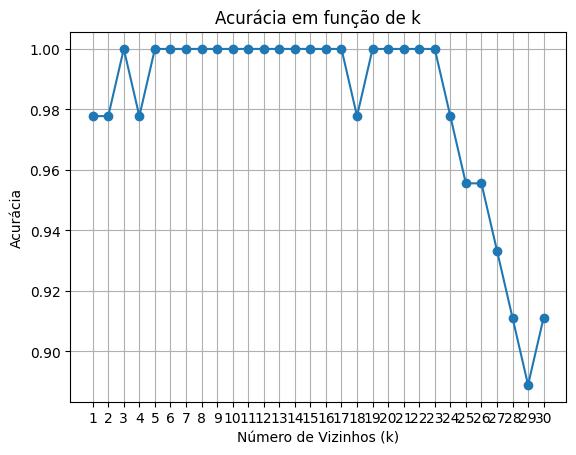

In [12]:
#Plotando os resultados
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Número de Vizinhos (k)')
plt.ylabel('Acurácia')
plt.title('Acurácia em função de k')
plt.grid()
plt.xticks(ticks=range(1, 31, 1))
plt.show()

###1.1.b) - Avaliação dos Parâmetros -  Distâncias (metric)


Para executar esse trecho de código, escolha o melhor k (neighbors) a partir do experimento anterior.

In [13]:
#Vetor dos tipos de distância
metrics = ['euclidean', 'manhattan']

#Determinando as accuracies para o melhor valor de K e para cada tipo de distância
for metric in metrics:
  knn = KNeighborsClassifier(n_neighbors=5,
                             metric=metric) #Construindo o classificador do modelo knn
  knn.fit(X_train, y_train)                 #Treinando o modelo knn com os dados de treino
  y_pred = knn.predict(X_test)              #Predição do modelo knn com os dados de teste
  acc = accuracy_score(y_test, y_pred)      #Calculo do accuracy_score
  print(f"Distância: {metric} | Acurácia: {acc:.4f}")

Distância: euclidean | Acurácia: 1.0000
Distância: manhattan | Acurácia: 1.0000


###1.1.c) - Avaliação dos Parâmetros -  Pesos (weights)

In [14]:
#Vetor dos tipos de pesos
weights_list = ['uniform', 'distance']

#Determinando as accuracies para o melhor valor de K, distância elclidiana e para tipo de peso
for w in weights_list:
  knn = KNeighborsClassifier(n_neighbors=5,
                             metric='euclidean',
                             weights=w) #Construindo o classificador do modelo knn
  knn.fit(X_train, y_train)             #Treinando o modelo knn com os dados de treino
  y_pred = knn.predict(X_test)          #Predição do modelo knn com os dados de teste
  acc = accuracy_score(y_test,y_pred)   #Calculo do accuracy_score
  print(f"Peso: {w} | Acurácia: {acc:.4f}")


Peso: uniform | Acurácia: 1.0000
Peso: distance | Acurácia: 1.0000


##1.2 - Parte 2 - SEM utilização de Normalização

In [15]:
# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

###1.2.a) - Avaliação dos Parâmetros - Número k de vizinhos (n_neighbors)

In [16]:
#Importando o classificador knn
from sklearn.neighbors import KNeighborsClassifier

#Importando as métricas - accuracy_score
from sklearn.metrics import accuracy_score

#Importanto a Biblioteca Matplotlib
import matplotlib.pyplot as plt

In [17]:
#Construindo vetor dos k vizinhos
k_values = range(1,31)

In [18]:
#Definindo variável de accuracies
accuracies = []

In [19]:
#Determinando as accuracies para cada valor de k
for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k) #Construindo o classificador do modelo knn
  knn.fit(X_train, y_train)                 #Treinando o modelo knn com os dados de treino
  y_pred = knn.predict(X_test)              #Predição do modelo knn com os dados de teste
  acc = accuracy_score(y_test,y_pred)       #Calculo do accuracy_score
  accuracies.append(acc)                    #Inserção do accuracy_score na lista accuracies


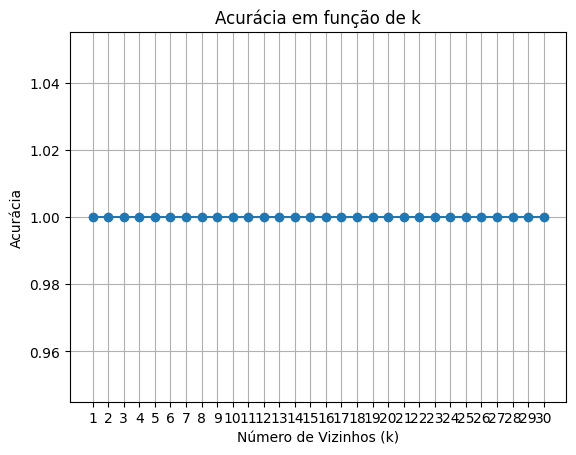

In [20]:
#Plotando os resultados
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Número de Vizinhos (k)')
plt.ylabel('Acurácia')
plt.title('Acurácia em função de k')
plt.grid()
plt.xticks(ticks=range(1, 31, 1))
plt.show()

###1.2.b) - Avaliação dos Parâmetros -  Distâncias (metric)


Para executar esse trecho de código, escolha o melhor k (neighbors) a partir do experimento anterior.

In [21]:
#Vetor dos tipos de distância
metrics = ['euclidean', 'manhattan']

#Determinando as accuracies para o melhor valor de K e para cada tipo de distância
for metric in metrics:
  knn = KNeighborsClassifier(n_neighbors=5,
                             metric=metric) #Construindo o classificador do modelo knn
  knn.fit(X_train, y_train)                 #Treinando o modelo knn com os dados de treino
  y_pred = knn.predict(X_test)              #Predição do modelo knn com os dados de teste
  acc = accuracy_score(y_test, y_pred)      #Calculo do accuracy_score
  print(f"Distância: {metric} | Acurácia: {acc:.4f}")

Distância: euclidean | Acurácia: 1.0000
Distância: manhattan | Acurácia: 1.0000


###1.2.c) - Avaliação dos Parâmetros -  Pesos (weights)

In [22]:
#Vetor dos tipos de pesos
weights_list = ['uniform', 'distance']

#Determinando as accuracies para o melhor valor de K, distância elclidiana e para tipo de peso
for w in weights_list:
  knn = KNeighborsClassifier(n_neighbors=5,
                             metric='euclidean',
                             weights=w) #Construindo o classificador do modelo knn
  knn.fit(X_train, y_train)             #Treinando o modelo knn com os dados de treino
  y_pred = knn.predict(X_test)          #Predição do modelo knn com os dados de teste
  acc = accuracy_score(y_test,y_pred)   #Calculo do accuracy_score
  print(f"Peso: {w} | Acurácia: {acc:.4f}")


Peso: uniform | Acurácia: 1.0000
Peso: distance | Acurácia: 1.0000


#2. BANCO DE DADOS:  WineQT.csv

In [23]:
#Importando Bibliotecas Pertinentes

import pandas as pd;                                  # Biblioteca Pandas
from sklearn.model_selection import train_test_split; # train_test_split do sklearn
from sklearn.preprocessing   import StandardScaler;   # Normalizador Padrão do sklearn

In [24]:
#Carregando Base de dados
df_wine = pd.read_csv("WineQT.csv", sep = ",");

In [25]:
# Verificar as primeiras linhas
print(df_wine.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [26]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [27]:
# Separar atributos e classe
X = df_wine.drop(columns = ['quality'])
y = df_wine['quality']

##2.1 - Parte 1 - Utilizando Normalização (StandardScaler)

In [67]:
# Normalização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [68]:
# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 42)

###2.1.a) - Avaliação dos Parâmetros - Número k de vizinhos (n_neighbors)

In [69]:
#Importando o classificador knn
from sklearn.neighbors import KNeighborsClassifier

#Importando as métricas - accuracy_score
from sklearn.metrics import accuracy_score

#Importanto a Biblioteca Matplotlib
import matplotlib.pyplot as plt

In [70]:
#Construindo vetor dos k vizinhos
k_values = range(1,31)

In [71]:
#Definindo variável de accuracies
accuracies = []

In [72]:
#Determinando as accuracies para cada valor de k
for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k) #Construindo o classificador do modelo knn
  knn.fit(X_train, y_train)                 #Treinando o modelo knn com os dados de treino
  y_pred = knn.predict(X_test)              #Predição do modelo knn com os dados de teste
  acc = accuracy_score(y_test,y_pred)       #Calculo do accuracy_score
  accuracies.append(acc)                    #Inserção do accuracy_score na lista accuracies


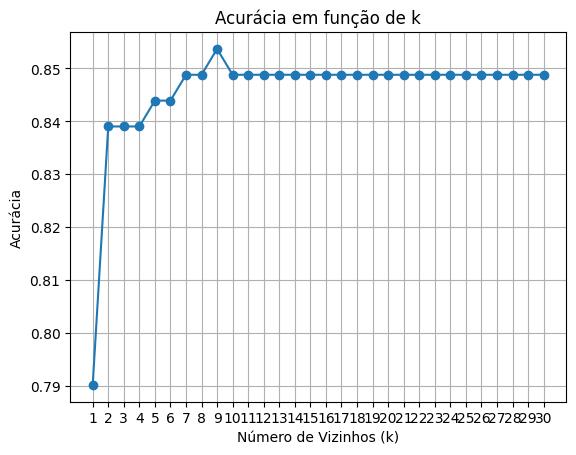

In [73]:
#Plotando os resultados
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Número de Vizinhos (k)')
plt.ylabel('Acurácia')
plt.title('Acurácia em função de k')
plt.grid()
plt.xticks(ticks=range(1, 31, 1))
plt.show()

###2.1.b) - Avaliação dos Parâmetros -  Distâncias (metric)


Para executar esse trecho de código, escolha o melhor k (neighbors) a partir do experimento anterior.

In [74]:
#Vetor dos tipos de distância
metrics = ['euclidean', 'manhattan']

#Determinando as accuracies para o melhor valor de K e para cada tipo de distância
for metric in metrics:
  knn = KNeighborsClassifier(n_neighbors=17,
                             metric=metric) #Construindo o classificador do modelo knn
  knn.fit(X_train, y_train)                 #Treinando o modelo knn com os dados de treino
  y_pred = knn.predict(X_test)              #Predição do modelo knn com os dados de teste
  acc = accuracy_score(y_test, y_pred)      #Calculo do accuracy_score
  print(f"Distância: {metric} | Acurácia: {acc:.4f}")

Distância: euclidean | Acurácia: 0.8488
Distância: manhattan | Acurácia: 0.8488


###2.1.c) - Avaliação dos Parâmetros -  Pesos (weights)

In [75]:
#Vetor dos tipos de pesos
weights_list = ['uniform', 'distance']

#Determinando as accuracies para o melhor valor de K, distância elclidiana e para tipo de peso
for w in weights_list:
  knn = KNeighborsClassifier(n_neighbors=17,
                             metric='euclidean',
                             weights=w) #Construindo o classificador do modelo knn
  knn.fit(X_train, y_train)             #Treinando o modelo knn com os dados de treino
  y_pred = knn.predict(X_test)          #Predição do modelo knn com os dados de teste
  acc = accuracy_score(y_test,y_pred)   #Calculo do accuracy_score
  print(f"Peso: {w} | Acurácia: {acc:.4f}")


Peso: uniform | Acurácia: 0.8488
Peso: distance | Acurácia: 0.8488


##2.2 - Parte 2 - SEM utilização de Normalização

In [37]:
# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

###2.2.a) - Avaliação dos Parâmetros - Número k de vizinhos (n_neighbors)

In [38]:
#Importando o classificador knn
from sklearn.neighbors import KNeighborsClassifier

#Importando as métricas - accuracy_score
from sklearn.metrics import accuracy_score

#Importanto a Biblioteca Matplotlib
import matplotlib.pyplot as plt

In [39]:
#Construindo vetor dos k vizinhos
k_values = range(1,31)

In [40]:
#Definindo variável de accuracies
accuracies = []

In [41]:
#Determinando as accuracies para cada valor de k
for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k) #Construindo o classificador do modelo knn
  knn.fit(X_train, y_train)                 #Treinando o modelo knn com os dados de treino
  y_pred = knn.predict(X_test)              #Predição do modelo knn com os dados de teste
  acc = accuracy_score(y_test,y_pred)       #Calculo do accuracy_score
  accuracies.append(acc)                    #Inserção do accuracy_score na lista accuracies


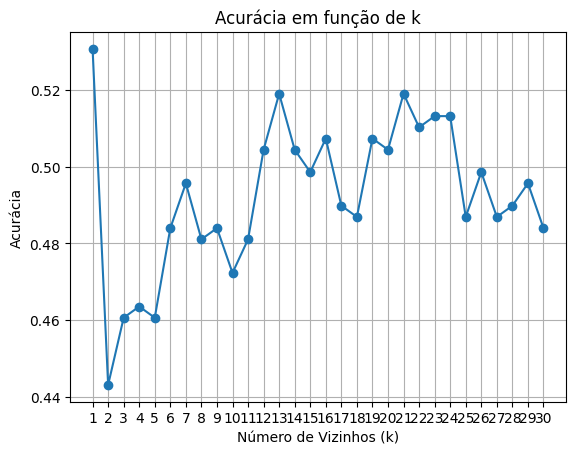

In [42]:
#Plotando os resultados
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Número de Vizinhos (k)')
plt.ylabel('Acurácia')
plt.title('Acurácia em função de k')
plt.grid()
plt.xticks(ticks=range(1, 31, 1))
plt.show()

###2.2.b) - Avaliação dos Parâmetros -  Distâncias (metric)


Para executar esse trecho de código, escolha o melhor k (neighbors) a partir do experimento anterior.

In [43]:
#Vetor dos tipos de distância
metrics = ['euclidean', 'manhattan']

#Determinando as accuracies para o melhor valor de K e para cada tipo de distância
for metric in metrics:
  knn = KNeighborsClassifier(n_neighbors=13,
                             metric=metric) #Construindo o classificador do modelo knn
  knn.fit(X_train, y_train)                 #Treinando o modelo knn com os dados de treino
  y_pred = knn.predict(X_test)              #Predição do modelo knn com os dados de teste
  acc = accuracy_score(y_test, y_pred)      #Calculo do accuracy_score
  print(f"Distância: {metric} | Acurácia: {acc:.4f}")

Distância: euclidean | Acurácia: 0.5190
Distância: manhattan | Acurácia: 0.4927


###2.2.c) - Avaliação dos Parâmetros -  Pesos (weights)

In [44]:
#Vetor dos tipos de pesos
weights_list = ['uniform', 'distance']

#Determinando as accuracies para o melhor valor de K, distância elclidiana e para tipo de peso
for w in weights_list:
  knn = KNeighborsClassifier(n_neighbors=13,
                             metric='euclidean',
                             weights=w) #Construindo o classificador do modelo knn
  knn.fit(X_train, y_train)             #Treinando o modelo knn com os dados de treino
  y_pred = knn.predict(X_test)          #Predição do modelo knn com os dados de teste
  acc = accuracy_score(y_test,y_pred)   #Calculo do accuracy_score
  print(f"Peso: {w} | Acurácia: {acc:.4f}")


Peso: uniform | Acurácia: 0.5190
Peso: distance | Acurácia: 0.5598


#3. BANCO DE DADOS:  evasao.csv

In [45]:
#Importando Bibliotecas Pertinentes

import pandas as pd;                                  # Biblioteca Pandas
from sklearn.model_selection import train_test_split; # train_test_split do sklearn
from sklearn.preprocessing   import StandardScaler;   # Normalizador Padrão do sklearn

In [46]:
#Carregando Base de dados
df_evasao = pd.read_csv("evasao.csv", sep = ",");

In [47]:
# Verificar as primeiras linhas
print(df_evasao.head())

   Cidade_Ouro Preto/MG  \
0                     0   
1                     0   
2                     0   
3                     0   
4                     0   

   ESCOLA_FUNDAMENTAL_Instituto Educacao Manoel Pinheiro  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   ESCOLA_FUNDAMENTAL_E. M. Dom Orione  \
0                                    0   
1                                    0   
2                                    0   
3                                    0   
4                                    0   

   ESCOLA_FUNDAMENTAL_E. M. Pres. Tancredo Neves  N_FILHOS  \
0                                              0       0.0   
1                                              1       0.0   
2                                    

In [48]:
df_evasao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681 entries, 0 to 680
Columns: 334 entries, Cidade_Ouro Preto/MG to Forma_Ingresso_Processo Seletivo Alternativo (rendimento Escolar)
dtypes: float64(2), int64(332)
memory usage: 1.7 MB


In [49]:
# Separar atributos e classe
X = df_evasao.drop(columns = ['Evadiu'])
y = df_evasao['Evadiu']

##3.1 - Parte 1 - Utilizando Normalização (StandardScaler)

In [50]:
# Normalização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [51]:
# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 42)

###3.1.a) - Avaliação dos Parâmetros - Número k de vizinhos (n_neighbors)

In [52]:
#Importando o classificador knn
from sklearn.neighbors import KNeighborsClassifier

#Importando as métricas - accuracy_score
from sklearn.metrics import accuracy_score

#Importanto a Biblioteca Matplotlib
import matplotlib.pyplot as plt

In [53]:
#Construindo vetor dos k vizinhos
k_values = range(1,31)

In [54]:
#Definindo variável de accuracies
accuracies = []

In [55]:
#Determinando as accuracies para cada valor de k
for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k) #Construindo o classificador do modelo knn
  knn.fit(X_train, y_train)                 #Treinando o modelo knn com os dados de treino
  y_pred = knn.predict(X_test)              #Predição do modelo knn com os dados de teste
  acc = accuracy_score(y_test,y_pred)       #Calculo do accuracy_score
  accuracies.append(acc)                    #Inserção do accuracy_score na lista accuracies


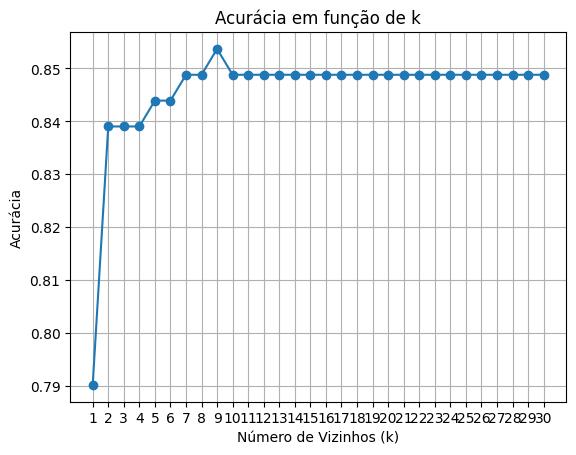

In [56]:
#Plotando os resultados
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Número de Vizinhos (k)')
plt.ylabel('Acurácia')
plt.title('Acurácia em função de k')
plt.grid()
plt.xticks(ticks=range(1, 31, 1))
plt.show()

###3.1.b) - Avaliação dos Parâmetros -  Distâncias (metric)


Para executar esse trecho de código, escolha o melhor k (neighbors) a partir do experimento anterior.

In [57]:
#Vetor dos tipos de distância
metrics = ['euclidean', 'manhattan']

#Determinando as accuracies para o melhor valor de K e para cada tipo de distância
for metric in metrics:
  knn = KNeighborsClassifier(n_neighbors=9,
                             metric=metric) #Construindo o classificador do modelo knn
  knn.fit(X_train, y_train)                 #Treinando o modelo knn com os dados de treino
  y_pred = knn.predict(X_test)              #Predição do modelo knn com os dados de teste
  acc = accuracy_score(y_test, y_pred)      #Calculo do accuracy_score
  print(f"Distância: {metric} | Acurácia: {acc:.4f}")

Distância: euclidean | Acurácia: 0.8537
Distância: manhattan | Acurácia: 0.8488


###3.1.c) - Avaliação dos Parâmetros -  Pesos (weights)

In [58]:
#Vetor dos tipos de pesos
weights_list = ['uniform', 'distance']

#Determinando as accuracies para o melhor valor de K, distância elclidiana e para tipo de peso
for w in weights_list:
  knn = KNeighborsClassifier(n_neighbors=9,
                             metric='euclidean',
                             weights=w) #Construindo o classificador do modelo knn
  knn.fit(X_train, y_train)             #Treinando o modelo knn com os dados de treino
  y_pred = knn.predict(X_test)          #Predição do modelo knn com os dados de teste
  acc = accuracy_score(y_test,y_pred)   #Calculo do accuracy_score
  print(f"Peso: {w} | Acurácia: {acc:.4f}")


Peso: uniform | Acurácia: 0.8537
Peso: distance | Acurácia: 0.8488


##3.2 - Parte 2 - SEM utilização de Normalização

In [59]:
# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

###3.2.a) - Avaliação dos Parâmetros - Número k de vizinhos (n_neighbors)

In [60]:
#Importando o classificador knn
from sklearn.neighbors import KNeighborsClassifier

#Importando as métricas - accuracy_score
from sklearn.metrics import accuracy_score

#Importanto a Biblioteca Matplotlib
import matplotlib.pyplot as plt

In [61]:
#Construindo vetor dos k vizinhos
k_values = range(1,31)

In [62]:
#Definindo variável de accuracies
accuracies = []

In [63]:
#Determinando as accuracies para cada valor de k
for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k) #Construindo o classificador do modelo knn
  knn.fit(X_train, y_train)                 #Treinando o modelo knn com os dados de treino
  y_pred = knn.predict(X_test)              #Predição do modelo knn com os dados de teste
  acc = accuracy_score(y_test,y_pred)       #Calculo do accuracy_score
  accuracies.append(acc)                    #Inserção do accuracy_score na lista accuracies


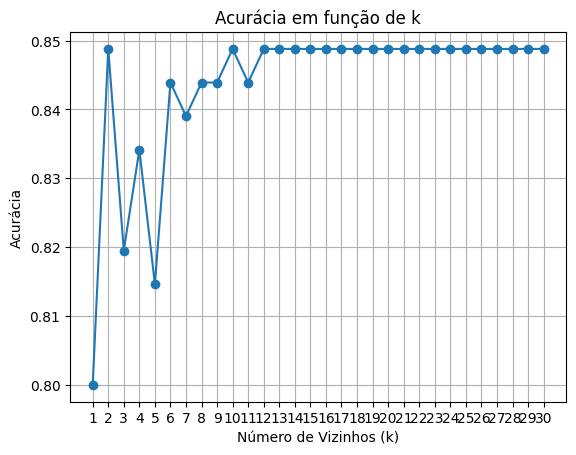

In [64]:
#Plotando os resultados
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Número de Vizinhos (k)')
plt.ylabel('Acurácia')
plt.title('Acurácia em função de k')
plt.grid()
plt.xticks(ticks=range(1, 31, 1))
plt.show()

###3.2.b) - Avaliação dos Parâmetros -  Distâncias (metric)


Para executar esse trecho de código, escolha o melhor k (neighbors) a partir do experimento anterior.

In [65]:
#Vetor dos tipos de distância
metrics = ['euclidean', 'manhattan']

#Determinando as accuracies para o melhor valor de K e para cada tipo de distância
for metric in metrics:
  knn = KNeighborsClassifier(n_neighbors=10,
                             metric=metric) #Construindo o classificador do modelo knn
  knn.fit(X_train, y_train)                 #Treinando o modelo knn com os dados de treino
  y_pred = knn.predict(X_test)              #Predição do modelo knn com os dados de teste
  acc = accuracy_score(y_test, y_pred)      #Calculo do accuracy_score
  print(f"Distância: {metric} | Acurácia: {acc:.4f}")

Distância: euclidean | Acurácia: 0.8488
Distância: manhattan | Acurácia: 0.8488


###3.2.c) - Avaliação dos Parâmetros -  Pesos (weights)

In [66]:
#Vetor dos tipos de pesos
weights_list = ['uniform', 'distance']

#Determinando as accuracies para o melhor valor de K, distância elclidiana e para tipo de peso
for w in weights_list:
  knn = KNeighborsClassifier(n_neighbors=10,
                             metric='euclidean',
                             weights=w) #Construindo o classificador do modelo knn
  knn.fit(X_train, y_train)             #Treinando o modelo knn com os dados de treino
  y_pred = knn.predict(X_test)          #Predição do modelo knn com os dados de teste
  acc = accuracy_score(y_test,y_pred)   #Calculo do accuracy_score
  print(f"Peso: {w} | Acurácia: {acc:.4f}")


Peso: uniform | Acurácia: 0.8488
Peso: distance | Acurácia: 0.8195


# 4. RESULTADOS

###Qual configuração teve melhor desempenho e por quê para cada conjunto de dados

A Base de Dados Iris é compostas por 150 regristros, 4 atributos (sepal_length, sepal_width, petal_length, petal_width), e 1 classe (species). Na avaliação que busca encontrar o melhor número de vizinhos (k) entre 1 e 31, observou-se uma ampla faixa de valores em que a acurácia ficou entre 0,98 e 1 (1 <= k <= 23), tendo seu valor diminuído para até 0,88 a partir do k > 23. Nesta avaliação escolheu-se o k = 5, por ser um dos valores com maior acurária (1,0) ser um valor historicamente bom. Supõe-se também que quando maior o valor de k o modelo se torna cada vez mais underfit. Partindo para a avaliação do melhor tipo de distância (euclidiana ou manhattan),acrescentou-se ao classificador, além do hiperparâmetro "n_neighbors" (igual a 5), mais um hiperparâmetro (metric) que pôde ser um dos tipos de distância citados acima. Não houve diferença diferença entre os tipos de distância euclidiana ou manhattan. Em ambas o valor da acurácia foi igual a 1. Por fim, realizando a avaliação do tipo de ponderação/peso (uniforme ou pela distância), acrescentou-se o hiperparâmetro "weights". Assim como na availição das distâncias, o acrescimo deste hiperparâmetro não teve efeito de melhoria no modelo, permanecendo o valor da acurária igual a 1 para ambos os pesos. A melhor configuração, portanto, para a base IRIS foi: n_neighbors=5, metric = euclidean ou manhattan, weights = uniform ou distance.

Para a Base de Dados WineQT, tem-se que ela é compostas por 1143 regristros, 12 atributos (fixed acidity, volatile acidity, citric acid,residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide,density, pH, sulphates, alcohol,Id), e 1 classe (quality). Na avaliação que busca encontrar o melhor número de vizinhos (k) entre 1 e 31, observou-se, de maneira geral, que aumentando o número de vizinho há uma melhora na acurária. Nesta avaliação escolheu-se o k = 17, por ser o valor com maior acurária (aproximadamente 0,64). Partindo para a avaliação do melhor tipo de distância (euclidiana ou manhattan),acrescentou-se ao classificador, além do hiperparâmetro "n_neighbors" (igual a 17), mais um hiperparâmetro (metric) que pôde ser um dos tipos de distância citados acima. Houve neste caso, uma piora no valor da acurácia. Para a distância euclidiana o valor foi de 0,6356, e para a distância de manhattan 0,6181. Por está bem próxima do valor de 0,64 escolheu-se a distância euclidiana. Por fim, realizando a avaliação do tipo de ponderação/peso (uniforme ou pela distância), acrescentou-se o hiperparâmetro "weights". O modelo que utilizou a ponderação pela distância teve uma melhoria da acurácia (0,6822), enquanto o modelo com a ponderação uniforme não houve alteração do valor (0,6356). A melhor configuração, portanto, para a base WineQT foi: n_neighbors=17, metric = euclidean, weights = distance.

Para a Base de Dados evasao, tem-se que ela é compostas por 681  regristros, 333 atributos, e 1 classe (evasao). Na avaliação que busca encontrar o melhor número de vizinhos (k) entre 1 e 31, observou-se que a melhor quantidade de vizinhos é k = 9, por ser o valor com maior acurária (aproximadamente 0,855). Partindo para a avaliação do melhor tipo de distância (euclidiana ou manhattan),acrescentou-se ao classificador, além do hiperparâmetro "n_neighbors" (igual a 9), mais um hiperparâmetro (metric) que pôde ser um dos tipos de distância citados acima. Não foi observado diferença significativa com o acrescimo do hiperparâmetro de distância. Para a distância euclidiana o valor da acuracia foi de 0,8537, enquanto para a direção de manhattan foi de 0,8488. Como a distância euclidiana foi um pouco maior escolheu-se ela. Por fim, realizando a avaliação do tipo de ponderação/peso (uniforme ou pela distância), acrescentou-se o hiperparâmetro "weights". Não houve melhoria da acuracia para ambas as situações. A melhor configuração, portanto, para a base evasao foi: n_neighbors=9, metric = euclidean, weights = distance ou uniform.

###Qual a influência da normalização

Observou-se que para cada de Base de Dados, assumindo a melhor configuração, houve diminuição do valor da acurácia, quando os atributos não foram normalizados. Para a base IRIS houve a diminuição de 1 para 0,8146, já para a base WineQT saiu de 0,6822 para 0,5598, e finalmente, para a base evasão de 0,8537 para 0,8488. Esta diminuição acontece, possivelmente, pelo fato que ao realizar a normalização tenta-se evitar distorções nas distâncias, fazendo com que as variáveis contribuam de maneira mais igual, evitando que uma variável se sobressaia sobre outra.